# Аналитика активности пользователей приложения Procrastinate Pro+

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года: лог сервера с данными об их посещениях, выгрузка их покупок за этот период, рекламные расходы.

<b> Цели проекта: </b> 
- исследование данных о пользователях, 
- определение причины неуспешности рекламы, 
- рекомендации по исправлению ситуации.

<b> Выводы: </b> 

<b> Причины неэффективности привлечения пользователей: </b>

Проведена оценка окупаемости рекламы. Рассчитаны LTV и ROI, построены графики. На основе графиков можно сделать следующие выводы: 
1. Реклама не окупается за 14 дней, ROI = 80%. CAC не постоянная величена, а увеличивается со временем. Траты на рекламу также увеличиваются со временем. LTV стабилен. ROI в динамике снижается. В мае-июне 2019 был выше уровня окупаемости, далее планомерно снижался примерно до 0.6.
2. При разбивке по устройствам: CAC росла со временем для всех устройств: причем для пользователей MAC и iPhone был резкий скачок в июне, Android и PC росли более плавно. ROI для PC больше единицы, причем в динамике наблюдаются постоянные скачки относительно уровня окупаемости вверх и вниз. ROI для Android приближается к 1 и выше общего ROI в 0.8, в динамике планомерно снижается. ROI для MAC и iPhone ниже общего ROI в 0.8, в динамике также снижаются, причем показатель стал ниже уровня окупаемости уже в июне.
3. При разбивке по странам: CAC для США резко увеличился в середине мая и продолжал расти. При этом CAC для Франции, Германии и Великобритании снизился в середине мая - начале июня и держался примерно на одном уровне. ROI для Франции, Германии и Великобритании преодлевает уровень окупаемости, для США - нет. ROI в динамике для Франции, Германии и Великобритании также положительны, а для США в мае был выше единицы и планомерно снижается.
4. При разбивке по каналам рекламы: CAC для TipTop растет скачками каждый месяц. Для остальных каналов CAC остается стабильным, значения и не увеличиваются, и не уменьшаются. Ниже уровня окупаемости оказались каналы TipTop, FaceBoom, AdNonSense. Реклама на всех остальных каналах окупилась, причем хорошие значения показывал канал YRabbit в июле.


<B> Рекомендации для отдела маркетинга: </B>
1. Следует обратить внимание на пользователей MAC, iPhone, Android. Стоимость привлечения пользователей увеличивается при этом нет окупаемости. Стоит помнить, что доля платящих пользователей на Mac самая высокая - 6.4%, далее iPhone - 6.2%, Android - 5.8%.
2. Основные пользователи из США, при этом они хуже всего окупаются. Для Франции, Германии и Великобритании стоимость привлечения одного пользователя примерно одинакова и реклама окупается. Поэтому следует обратить больше вниимания на рекламу для пользователей из Франции, Германии и Великобритании.
3. Следует сократить траты на рекламу в TipTop и FaceBoom. А далее перераспределить этот бюджет на другие каналы, более окупаемые, например, YRabbit.
4. Возможно, стоит разработать спец. предложение для пользователей ОС IOS и Android. 
5. Доработала пункт выше: рекомендую обратить внимание на каналы lambdaMediaAds, RocketSuperAds и WahooNetBanner. У них хороший LTV, стабильный и невысокий CAC, ROI выше уровня окупаемости, при этом: в топ-6 по конверсии и хорошее удержание платящих пользователей.

## Загрузка данных и подготовка их к анализу

In [1]:
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import math
import time
from datetime import datetime
from datetime import date, timedelta as td

In [58]:
path = '' # путь к датасетам

In [3]:
visits = pd.read_csv(path + 'visits_info_short.csv')
orders = pd.read_csv(path + 'orders_info_short.csv')
costs = pd.read_csv(path + 'costs_info_short.csv')

In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


В датафрейме Visits: 309901 строка, нет пропусков. Необходимо переименовать столбцы, изменить тип данных в столбцах с началои и окончанием сессий (остальные столбцы можно не трогать), проверить дф на наличие дубликатов.

In [6]:
visits.duplicated().sum()

0

Явных дубликатов нет.

In [7]:
visits = visits.rename(
    columns={
        'User Id':'user_id',
        'Region':'region',
        'Device':'device',
        'Channel':'channel',
        'Session Start':'session_start',
        'Session End':'session_end'
    })

In [8]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [9]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


Провела предобработку данных в датафрейме Visits. Приступим к Orders.

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [11]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


ДФ orders имеет 40212 строк, пропусков нет. Необходимо переименовать столбцы, проверить дф на наличие дубликатов, изменить тип данных в столбце с датой и временем покупки (остальные столбцы можно не трогать). Такс:

In [12]:
orders = orders.rename(
    columns={
        'User Id':'user_id',
        'Event Dt':'event_dt',
        'Revenue':'revenue'
    })

In [13]:
orders.duplicated().sum()

0

In [14]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


Провела предобработку данных в датафрейме Orders. Приступим к Costs.

In [16]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [17]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


ДФ costs имеет 1800 строк, пропусков нет. Необходимо переименовать столбцы, проверить наличие дубдикатов, преобразовать тип данных в столбце с датой проведения рекл. кампании (остальные столбцы можно не трогать).

In [18]:
costs = costs.rename(
    columns={
        'Channel':'channel',
    })

In [19]:
costs.duplicated().sum()

0

In [20]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [21]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


Провела предобработку данных в датафрейме Costs.

<b> Вывод 1: </b> загрузила данные о визитах, заказах и рекламных расходах, провела предобработку: пропусков и дубликатов не было обнаружено, но были изменены типы данных.

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [22]:
# для создания профилей пользователей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [23]:
# для подсчёта Retention Rate

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [24]:
# для подсчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [25]:
# для подсчёта LTV 

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # что мы здесь делаем???
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [26]:
# для сглаживания данных 

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [27]:
# для построения графика Retention Rate

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [28]:
# для построения графика конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [29]:
# для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

<b> Вывод 2: </b> добавила требуемые функции.

## Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

### Составление профилей пользователей

In [30]:
profiles = get_profiles(visits, orders, costs)

In [31]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-07 20:58:57,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-09 12:46:07,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01 09:58:33,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-22 21:35:48,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-02 00:07:44,False,0.230769


In [32]:
profiles['dt'].min()

Timestamp('2019-05-01 00:00:00')

In [33]:
profiles['dt'].max()

Timestamp('2019-10-27 00:00:00')

Получила, что минимальная дата привлечения пользователей - 1 мая 2019, максимальная - 27 октября 2019. Как и написано в задании.

<b> Вывод 3.1: </b> составила профили пользователей. Выяснила минимальную и максимальную даты привлечения пользователей - это 1 мая 2019г. и 27 октября 2019г. соответственно.

### Анализ пользователей по странам

In [34]:
region_data = pd.DataFrame()
region_data['users_amount'] = profiles.groupby('region')['user_id'].count()
region_data['users_%'] = ((region_data['users_amount'] / profiles['region'].count()) * 100)
region_data['payers_amount'] = profiles.query('payer == True').groupby('region')['user_id'].count()
region_data['payers_%'] = ((region_data['payers_amount'] / region_data['users_amount']) * 100)
region_data.sort_values(by='payers_%', ascending=False)

,users_amount,users_%,payers_amount,payers_%
region,,,,
United States,100002,66.664445,6902,6.901862
Germany,14981,9.986801,616,4.111875
UK,17575,11.716042,700,3.982930
France,17450,11.632713,663,3.799427


<b> Вывод 3.2: </b> составила таблицу по странам пользователей приложения. Получила, 2/3 пользователей приложения из США, далее идут Великобритания и Франция - около 12% каждая, и примерно 10% пользователей из Германии. При этом доля платящий пользователей из США также самая высокая - 7% (6902 чел.), далее страны идут примерно с одинаковыми долями в 4 % - Германия (616 чел.), Великобритания (700 чел.), Франция (663 чел.).

### Анализ пользователей по девайсам

In [35]:
device_data = pd.DataFrame()
device_data['users_amount'] = profiles.groupby('device')['user_id'].count()
device_data['users_%'] = ((device_data['users_amount'] / profiles['device'].count()) * 100)
device_data['payers_amount'] = profiles.query('payer == True').groupby('device')['user_id'].count()
device_data['payers_%'] = ((device_data['payers_amount'] / device_data['users_amount']) * 100)
device_data.sort_values(by='payers_%', ascending=False)

,users_amount,users_%,payers_amount,payers_%
device,,,,
Mac,30042,20.026932,1912,6.364423
iPhone,54479,36.317396,3382,6.207897
Android,35032,23.353421,2050,5.851793
PC,30455,20.302251,1537,5.046790


<b> Вывод 3.3: </b> составила таблицу по устройствам пользователей. Получила, что 36% - это пользователи на iPhone, 23% - Android и по 20% - компьютеры и Mac. При этом доля платящих пользователей на Mac самая высокая - 6.4%, далее iPhone - 6.2%, Android - 5.8% и PC - 5%.

### Анализ каналов рекламы

In [36]:
# исключу органических пользователей
profiles = profiles.query('channel != "organic"')

In [37]:
channel_data = pd.DataFrame()
channel_data['users_amount'] = profiles.groupby('channel')['user_id'].count()
channel_data['users_%'] = ((channel_data['users_amount'] / profiles['channel'].count()) * 100)
channel_data['payers_amount'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
channel_data['payers_%'] = ((channel_data['payers_amount'] / channel_data['users_amount']) * 100)
channel_data.sort_values(by='payers_%', ascending=False)

,users_amount,users_%,payers_amount,payers_%
channel,,,,
FaceBoom,29144,31.147068,3557,12.204914
AdNonSense,3880,4.146673,440,11.340206
lambdaMediaAds,2149,2.296701,225,10.469986
TipTop,19561,20.905428,1878,9.600736
RocketSuperAds,4448,4.753711,352,7.913669
WahooNetBanner,8553,9.140848,453,5.296387
YRabbit,4312,4.608364,165,3.826531
MediaTornado,4364,4.663938,156,3.574702
LeapBob,8553,9.140848,262,3.063253


<b> Вывод 3.4: </b> получила, что больше всего платящих клиентов пришли через FaceBoom - 12.2% (3557 пользователей). Следом идут AdNonSense - 11.3% (440 польз.) и lambdaMediaAds - 10.5% (225 польз.). Меньше всего платящих пользователей пришло из OppleCreativeMedia - 2.7% (233 польз.), также LeapBob, MediaTornado, YRabbit	- каждый по 3% платящих пользователей.

<b> Вывод 3: </b> составила профили пользователей. Можно составить портрет платящего пользователя - это пользователь из США, он пользуется устройством Mac или iphone, увидел рекламу на площадке FaceBoom.

## Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

### Общая сумма расходов на маркетинг

In [38]:
total_cost = costs['costs'].sum()
total_cost

105497.30000000002

<b> Вывод 4.1 </b> Общая сумма расходов на рекламу - 105 497.3 денежных единиц.

### Расходы на рекламу по источикам

In [39]:
channel_costs = pd.DataFrame()
channel_costs['costs'] = costs.groupby('channel')['costs'].sum()
channel_costs['costs_%'] = ((channel_costs['costs'] / total_cost) * 100)
channel_costs.sort_values(by='costs_%', ascending=False)

,costs,costs_%
channel,,
TipTop,54751.30,51.898295
FaceBoom,32445.60,30.754910
WahooNetBanner,5151.00,4.882589
AdNonSense,3911.25,3.707441
OppleCreativeMedia,2151.25,2.039152
RocketSuperAds,1833.00,1.737485
LeapBob,1797.60,1.703930
lambdaMediaAds,1557.60,1.476436
MediaTornado,954.48,0.904744


<b> Вывод 4.2: </b> составила таблицу с тратами на каждый канал рекламы. Получила, что половина трат на рекламу потрачена на канал TipTop, далее 30% - на FaceBoom, то есть суммарно 80%. Остальные 20% трат на рекламу потрачены суммарно на все остальные источники.

### Визуализация динамики изменения расходов по каждому источнику во времени

Сначала соберу сводную таблицу.

In [40]:
costs['week'] = costs['dt'].dt.isocalendar().week # добавила неделю
costs['month'] = costs['dt'].dt.month # добавила месяц
costs.head()

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,18,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5


In [41]:
channel_costs_weekly_report = costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')
channel_costs_weekly_report.head()

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
week,,,,,,,,,,
18,211.05,535.7,16.80,38.64,24.00,99.450,347.0,49.2,52.2,81.6
19,273.00,750.2,31.71,61.68,34.50,139.230,470.0,92.4,75.9,103.2
20,265.65,755.7,26.67,59.04,27.50,138.060,454.0,90.0,69.3,90.4
21,266.70,722.7,26.67,50.16,34.25,131.040,801.8,79.2,65.4,119.2
22,202.65,1208.9,65.52,36.96,81.75,97.695,1421.2,179.4,49.8,83.2


In [42]:
channel_costs_monthly_report = costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')
channel_costs_monthly_report.head()

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
month,,,,,,,,,,
5,1169.70,3524.4,140.28,238.56,169.75,577.980,2981.0,418.8,299.70,458.4
6,538.65,5501.1,314.58,138.00,370.00,325.715,6675.6,921.0,106.20,199.2
7,504.00,5294.3,313.53,138.48,366.50,252.070,8410.2,851.4,97.38,219.2
8,579.60,6274.4,369.81,154.56,439.25,253.110,11202.0,1040.4,124.74,220.0
9,581.70,6114.9,343.98,144.72,427.75,218.400,13232.5,977.4,152.79,247.2


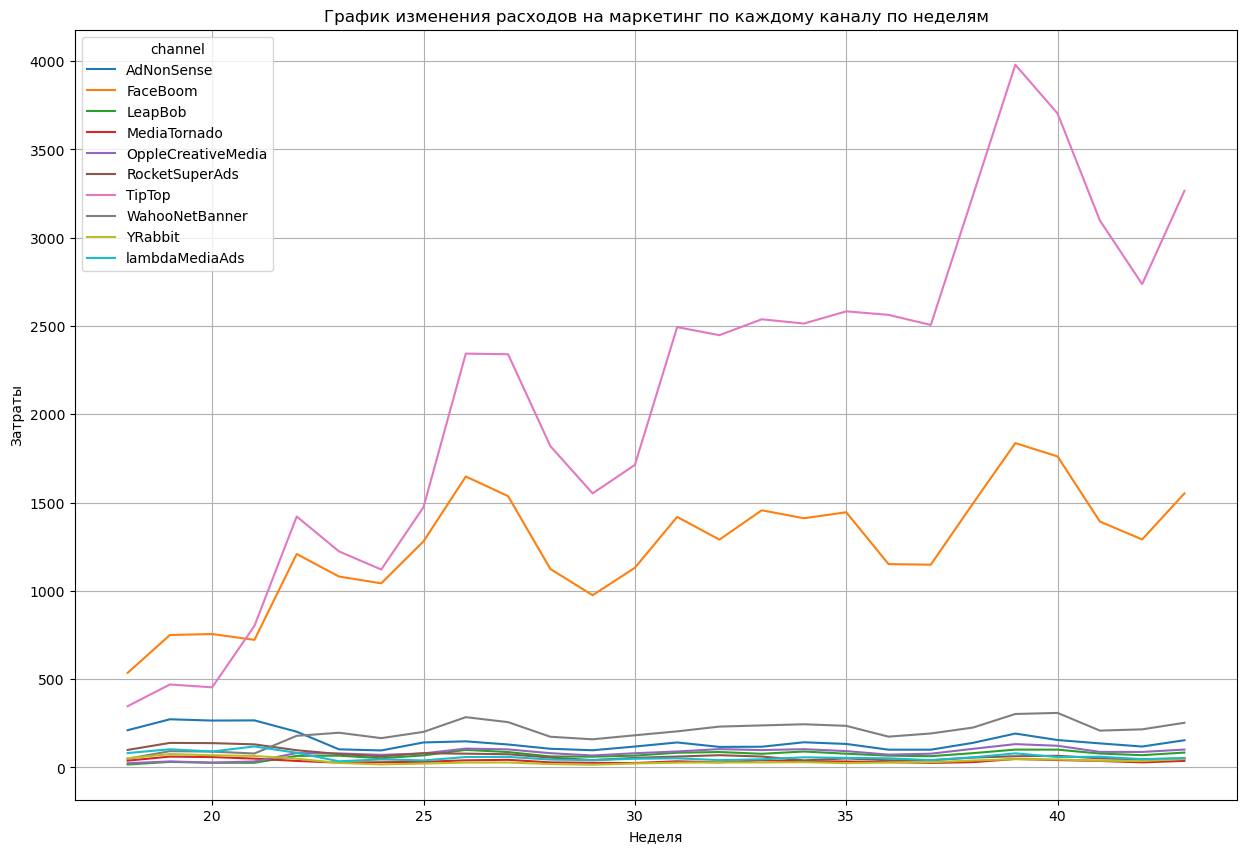

In [43]:
channel_costs_weekly_report.plot(
    figsize=(15, 10), 
    grid=True,
    legend=True
) 

plt.title('График изменения расходов на маркетинг по каждому каналу по неделям')
plt.xlabel('Неделя')
plt.ylabel('Затраты')
plt.show()

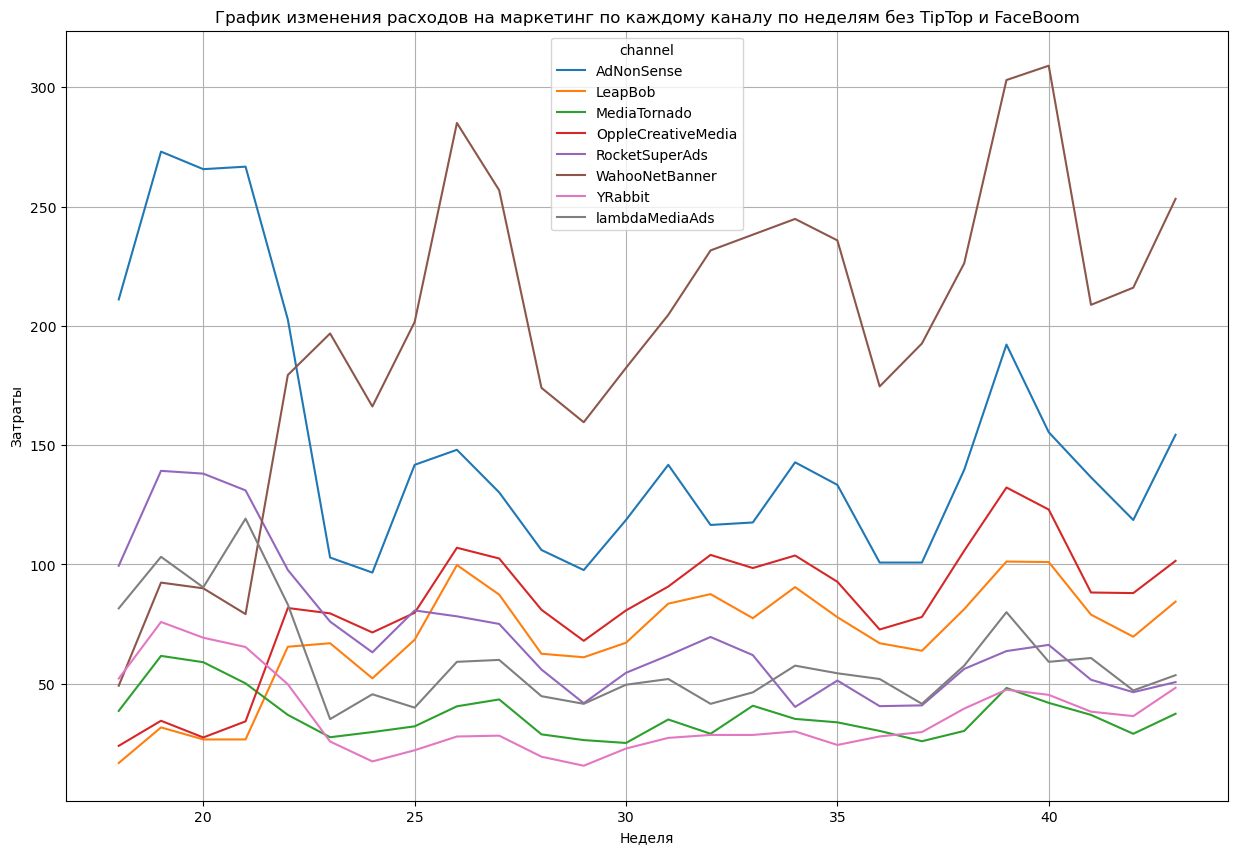

In [44]:
channel_costs_weekly_report = channel_costs_weekly_report.loc[:, ~channel_costs_weekly_report.columns.isin(['TipTop', 'FaceBoom'])]

channel_costs_weekly_report.plot(
    figsize=(15, 10), 
    grid=True,
    legend=True
) 

plt.title('График изменения расходов на маркетинг по каждому каналу по неделям без TipTop и FaceBoom')
plt.xlabel('Неделя')
plt.ylabel('Затраты')
plt.show()

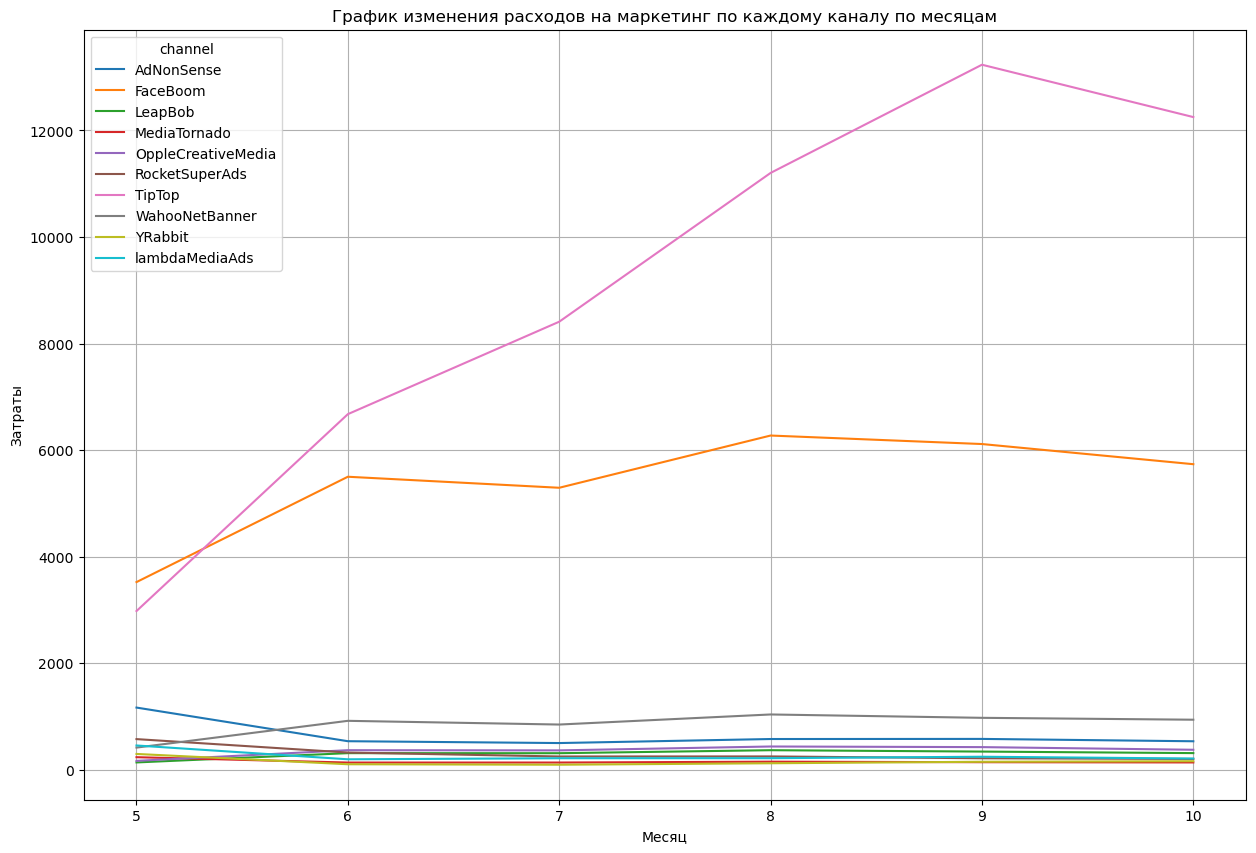

In [45]:
channel_costs_monthly_report.plot(
    figsize=(15, 10), 
    grid=True,
    legend=True
) 

plt.title('График изменения расходов на маркетинг по каждому каналу по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Затраты')
plt.show()

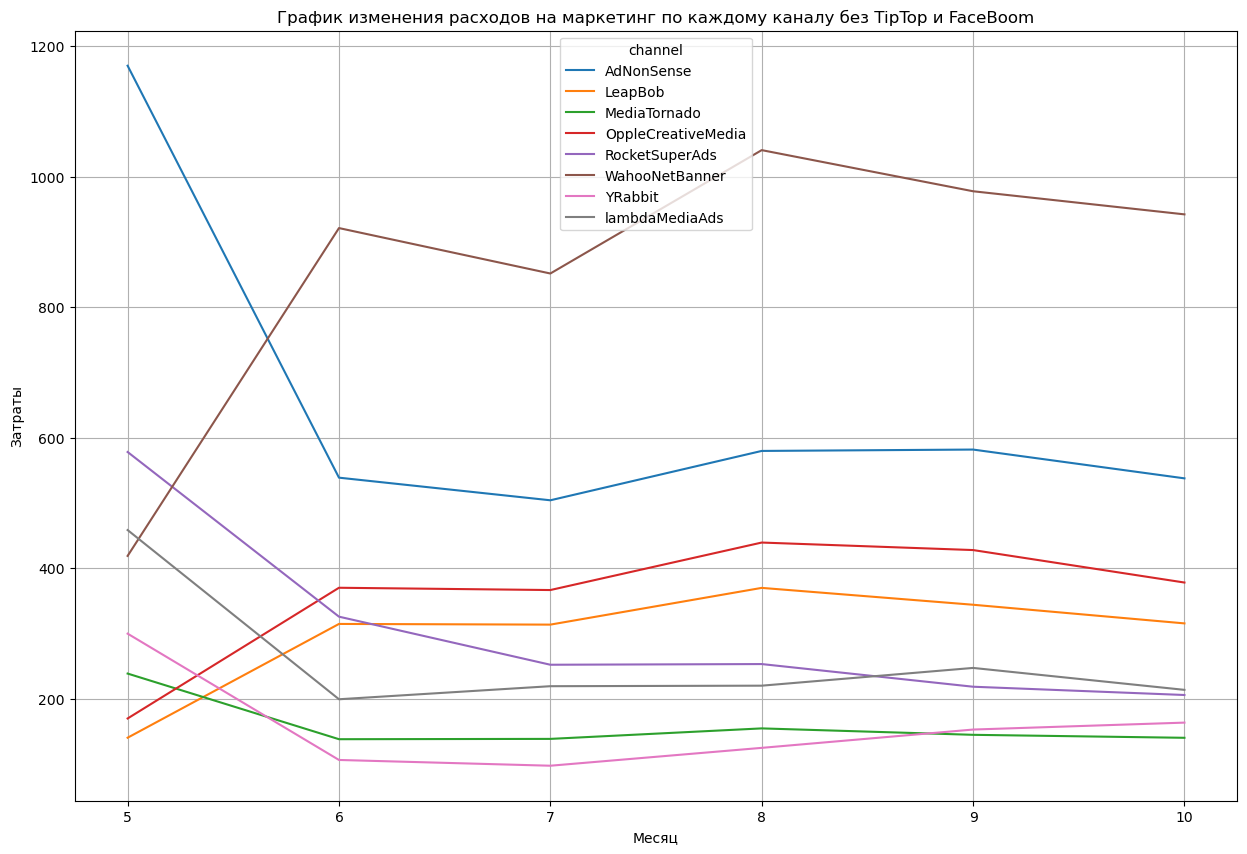

In [46]:
channel_costs_monthly_report = channel_costs_monthly_report.loc[:, ~channel_costs_monthly_report.columns.isin(['TipTop', 'FaceBoom'])]

channel_costs_monthly_report.plot(
    figsize=(15, 10), 
    grid=True,
    legend=True
) 

plt.title('График изменения расходов на маркетинг по каждому каналу без TipTop и FaceBoom')
plt.xlabel('Месяц')
plt.ylabel('Затраты')
plt.show()

<b> Вывод 4.3: </b> построила графики динамики изменения расходов по каждому источнику по неделям и по месяцам. Могу отметить, что расходы на площадки TipTop и FaceBoom значительно росли с мая по октябрь 2019г. относительно других площадок. Также расходы увеличивались на площадку WahooNetBanner (но рост гораздо меньше, чем для TipTop и FaceBoom). Расходы на AdNonSense снижались. Расходы на остальные каналы в целом были в диапозоне от 150 до 600 ден. единиц. в месяц, росли и снижались, но эти изменения незначительны на фоне TipTop и FaceBoom.

### Расчет средней стоимости привлечения одного пользователя (CAC) из каждого источника

In [47]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-07 20:58:57,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-09 12:46:07,False,1.107237
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-22 21:35:48,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-02 00:07:44,False,0.230769
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-30 03:46:29,True,1.008000


In [48]:
channel_cac = pd.DataFrame()
channel_cac['cac'] = profiles.groupby('channel')['acquisition_cost'].mean().round(3)
channel_cac.sort_values(by='cac', ascending=False)

,cac
channel,
TipTop,2.799
FaceBoom,1.113
AdNonSense,1.008
lambdaMediaAds,0.725
WahooNetBanner,0.602
RocketSuperAds,0.412
OppleCreativeMedia,0.250
MediaTornado,0.219
YRabbit,0.219


<b> Вывод 4.4: </b> расчитала среднюю стоимость привлечения пользователя по каналам. Получила, что самый дорогой пользователь с TipTop - 2.8 единиц, следом идет FaceBoom (1.1 ед.) и AdNonSense (1 ед.).

<b> Вывод 4: </b> Всего на маркетинг потрачено 105 497.3 денежных единиц.

50% трат на рекламу ушли на канал TipTop, 30% - на FaceBoom (суммарно 80%). Остальные 20% - на все остальные источники.

С мая по октябрь 2019г. траты на рекламу через TipTop и FaceBoom росли. Также росли расходны на канал WahooNetBanner.

Рсчитала среднюю стоимость привлечения пользователей по каналам. Площадка TipTop - 2.8 единиц за пользователя, FaceBoom - 1.1 ед.

## Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

По заданию момент анализа - 1 ноября 2019г. Горизонт анализа - 2 недели. Зададим соответствующие переменные:

In [49]:
observation_date = datetime(2019, 11, 1).date() # момент 
horizon_days = 14 # горизонт

### Анализ окупаемости рекламы c помощью LTV, CAC и ROI

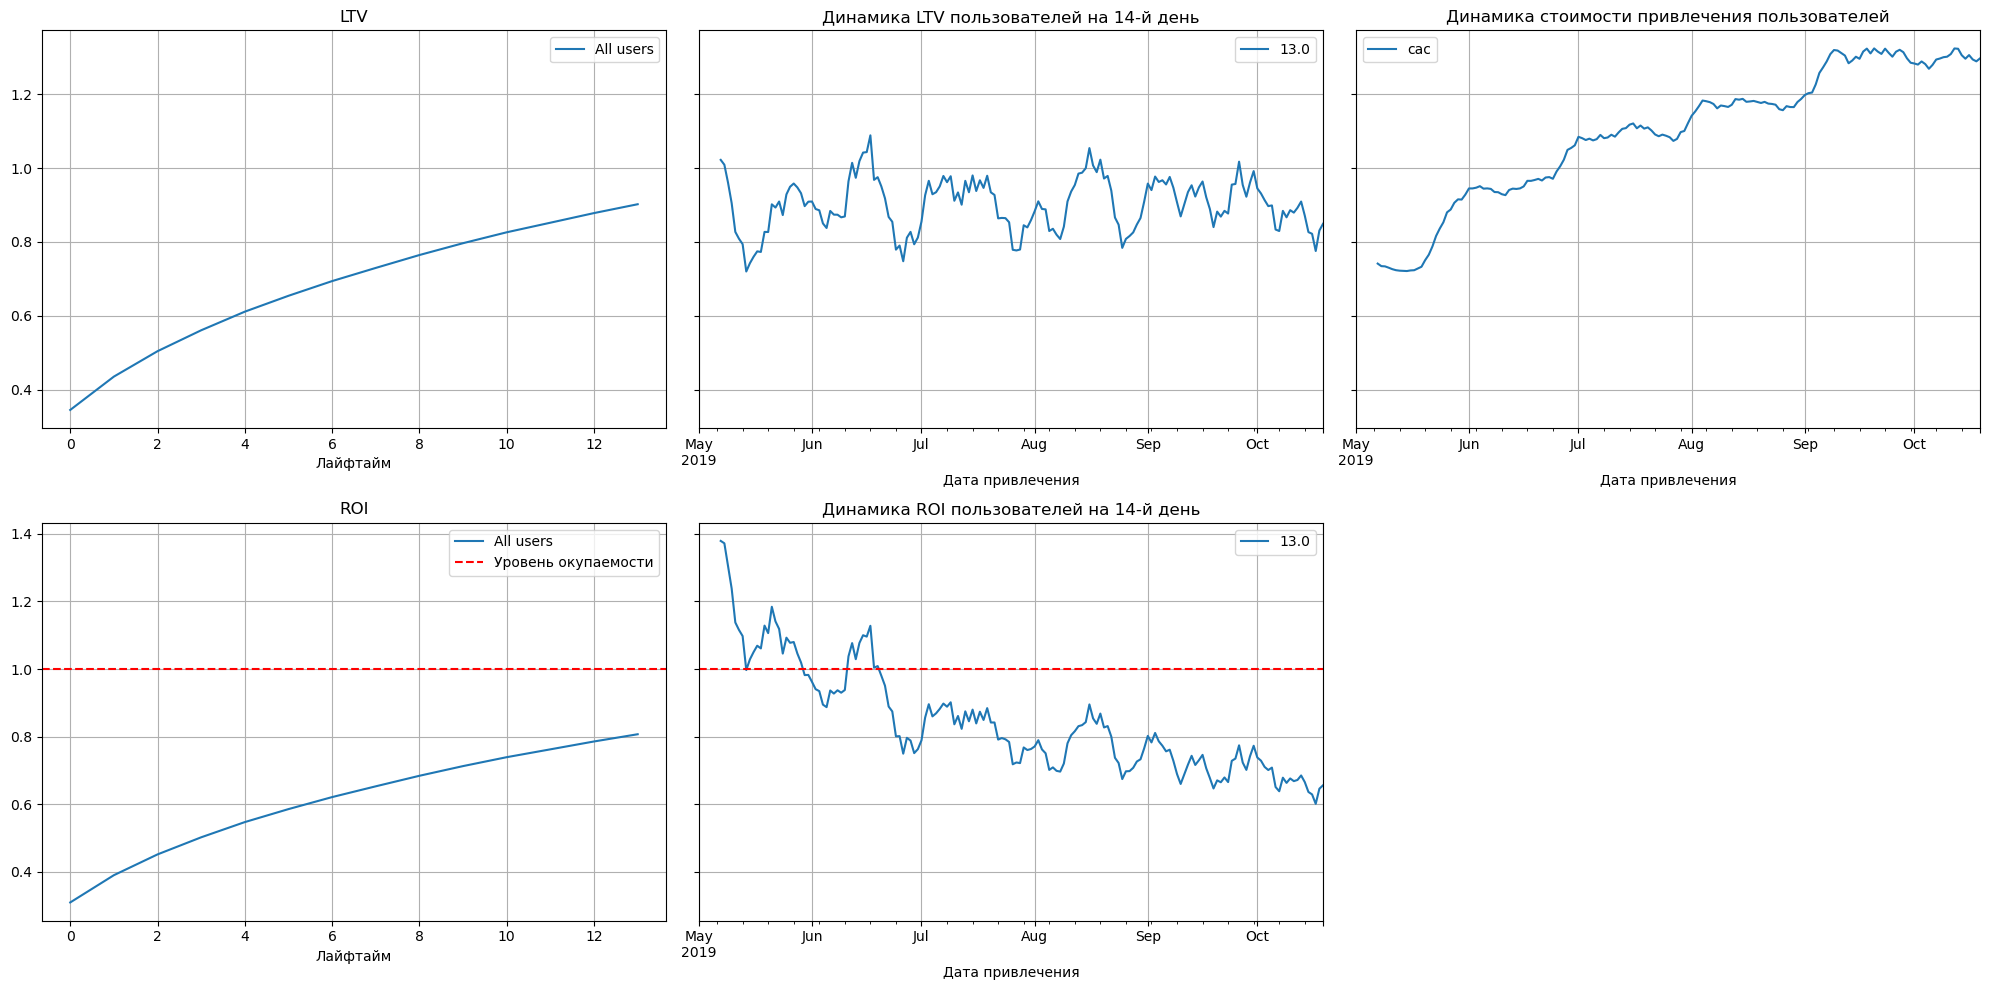

In [50]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, horizon_days)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days)

<b> Вывод 5.1: </b> 
1. LTV стабилен.
2. CAC растет со временем, значит, и расходы на рекламу также увеличиваются.
3. ROI на уровне 0.8, значит, реклама не окупается за 2 недели.
4. ROI в динамике снижается. В мае-июне 2019 был выше уровня окупаемости, далее планомерно снижался примерно до 0.6.

### Анализ конверсии и удержания пользователей

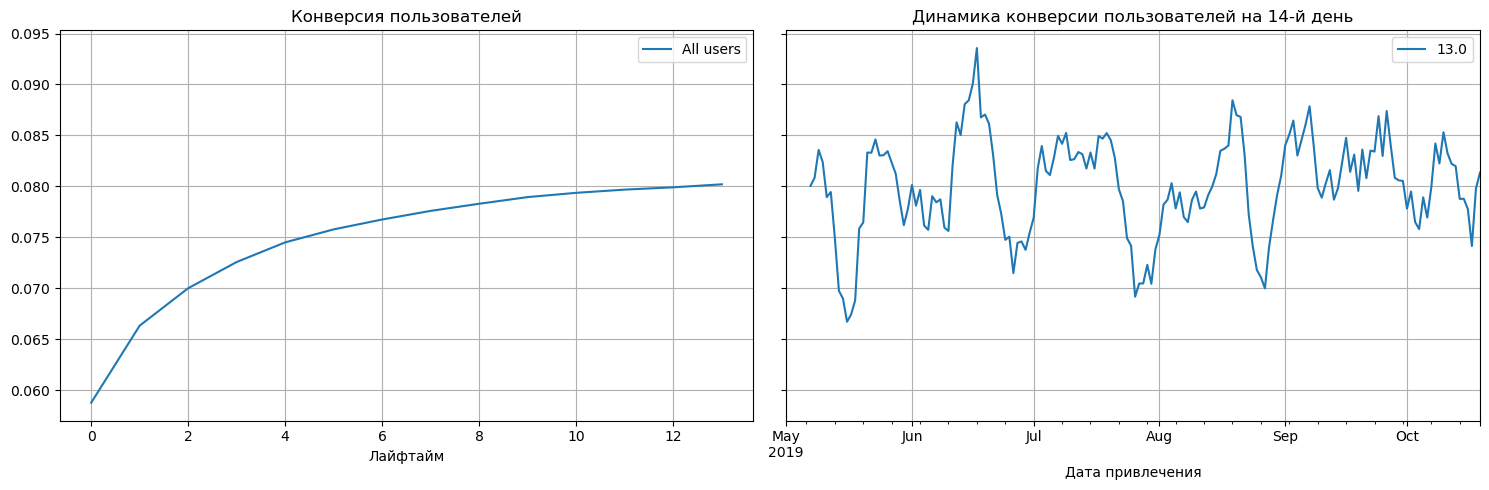

In [51]:
conversion_raw, conversion, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days)
plot_conversion(conversion, conversion_history, horizon_days, window=7)

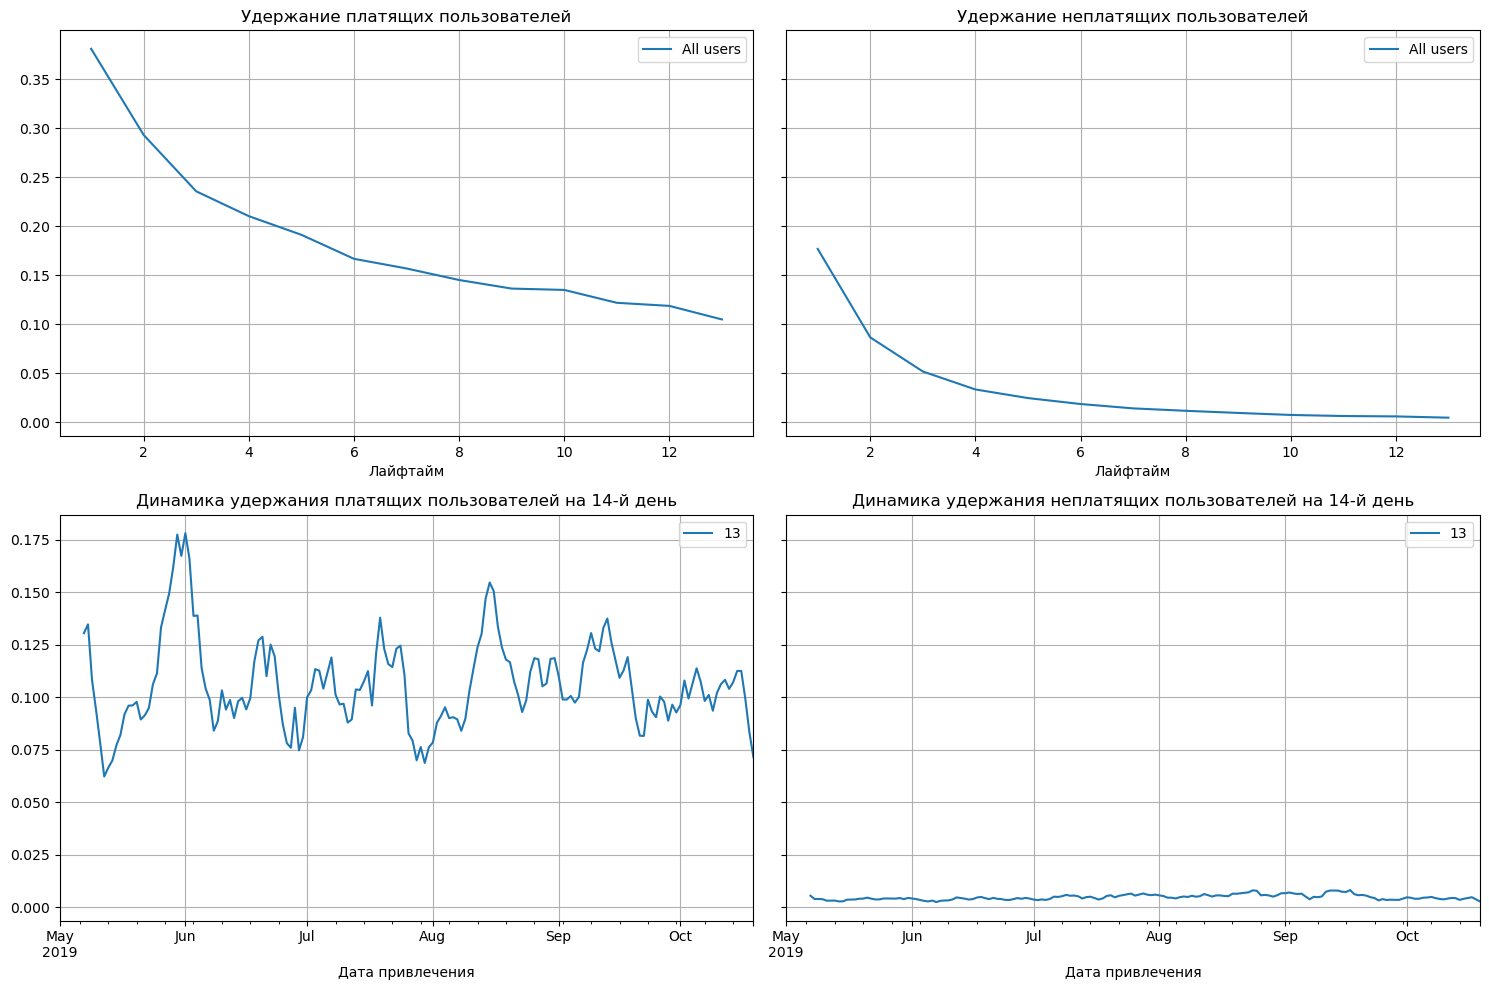

In [52]:
retention_raw, retention, retention_history = get_retention(profiles, visits, observation_date, horizon_days)
plot_retention(retention, retention_history, horizon_days) 

<b> Вывод 5.2 </b>
1. Пользователи за период с мая по октябрь 2019г. конвертировались постоянно и хорошо.
2. Неплатящие пользователи удерживаются стабильно плохо, хуже, чем платящие.
В целом графики выглядят нормально. Нельзя сказать, что общие конверсия или удержаниие страдают.

### Анализ окупаемости рекламы с разбивкой по устройствам

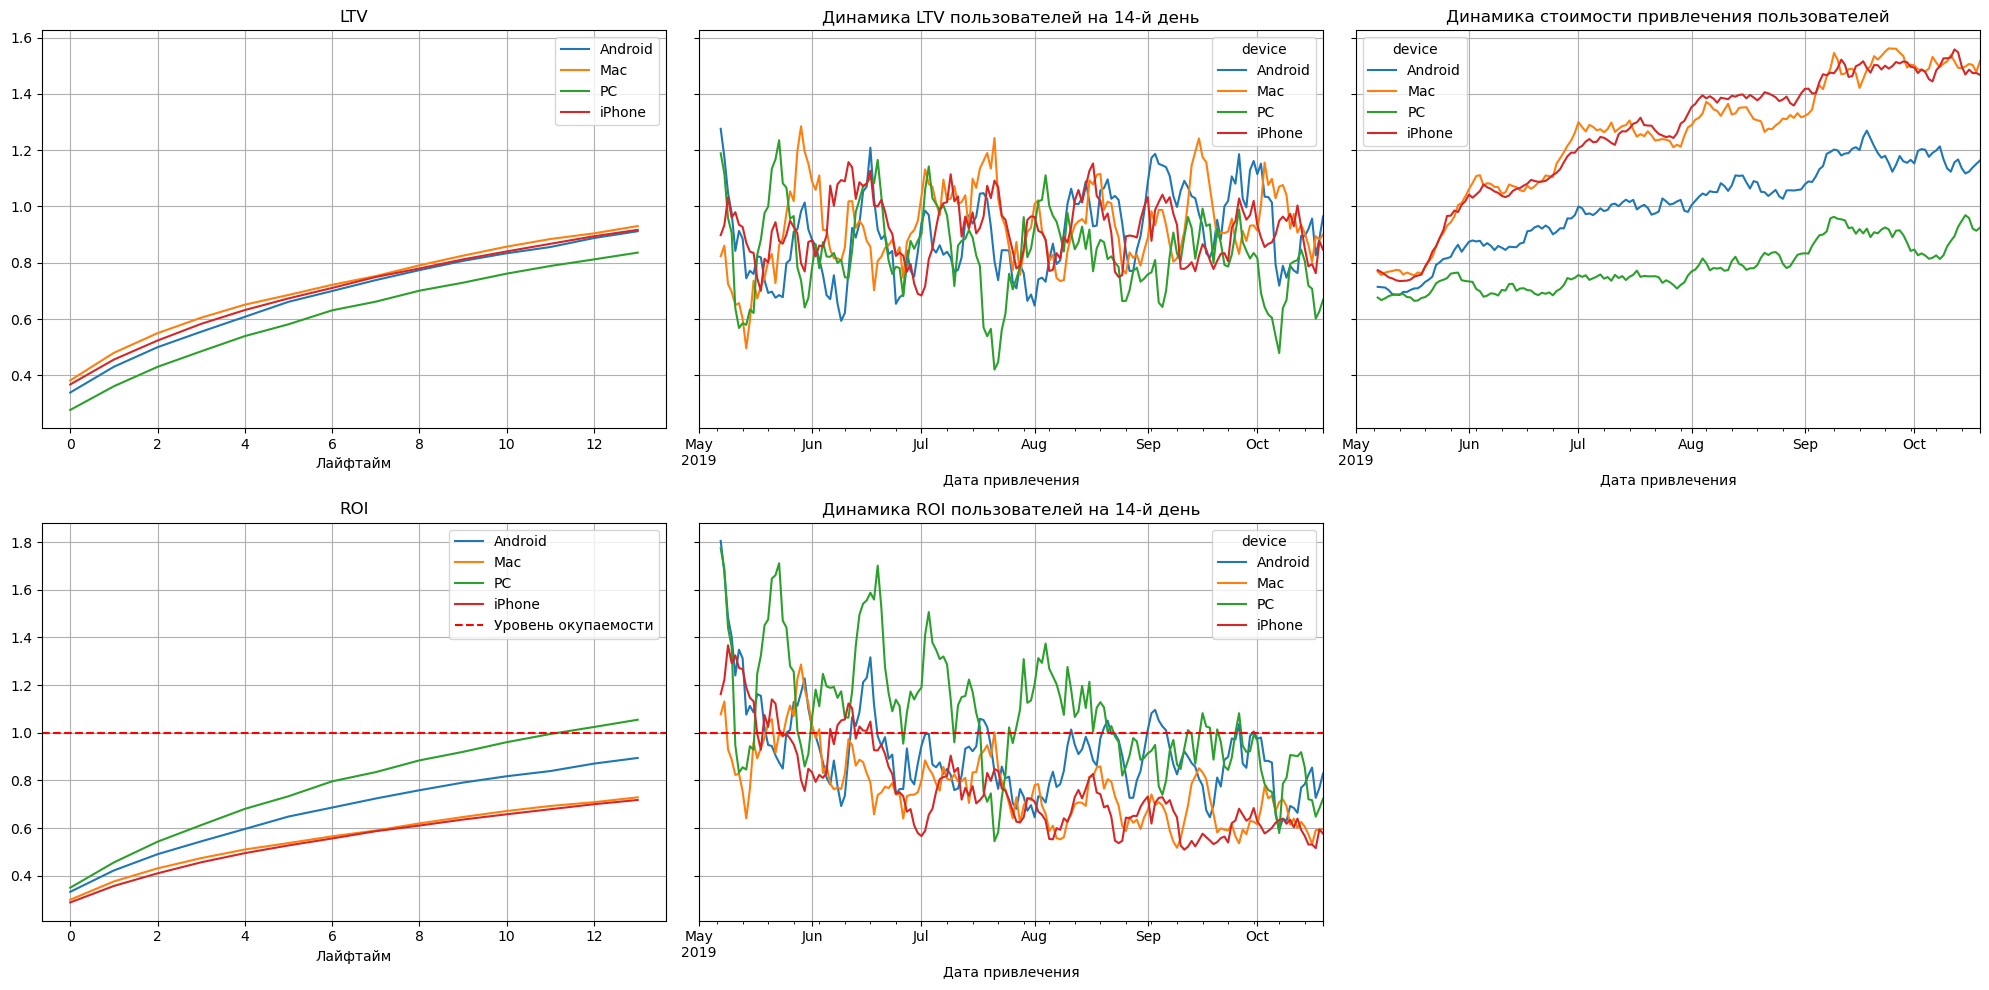

In [53]:
dimensions = ['device'] # задаем разбивку
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=dimensions)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days)

<b> Вывод 5.3: </b> построила графики LTV, ROI, CAC в разбивке по устройствам.
1. LTV стабилен.
2. CAC росла со временем для всех устройств: причем для пользователей MAC и iPhone был резкий скачок в июне, Android и PC росли более плавно.
3. ROI для PC больше единицы, причем в динамике наблюдаются постоянные скачки относительно уровня окупаемости вверх и вниз. ROI для Android приближается к 1 и выше общего ROI в 0.8, в динамике планомерно снижается. ROI для MAC и iPhone ниже общего ROI в 0.8, в динамике также снижаются, причем показатель стал ниже уровня окупаемости уже в июне.

### Анализ окупаемости рекламы с разбивкой по странам

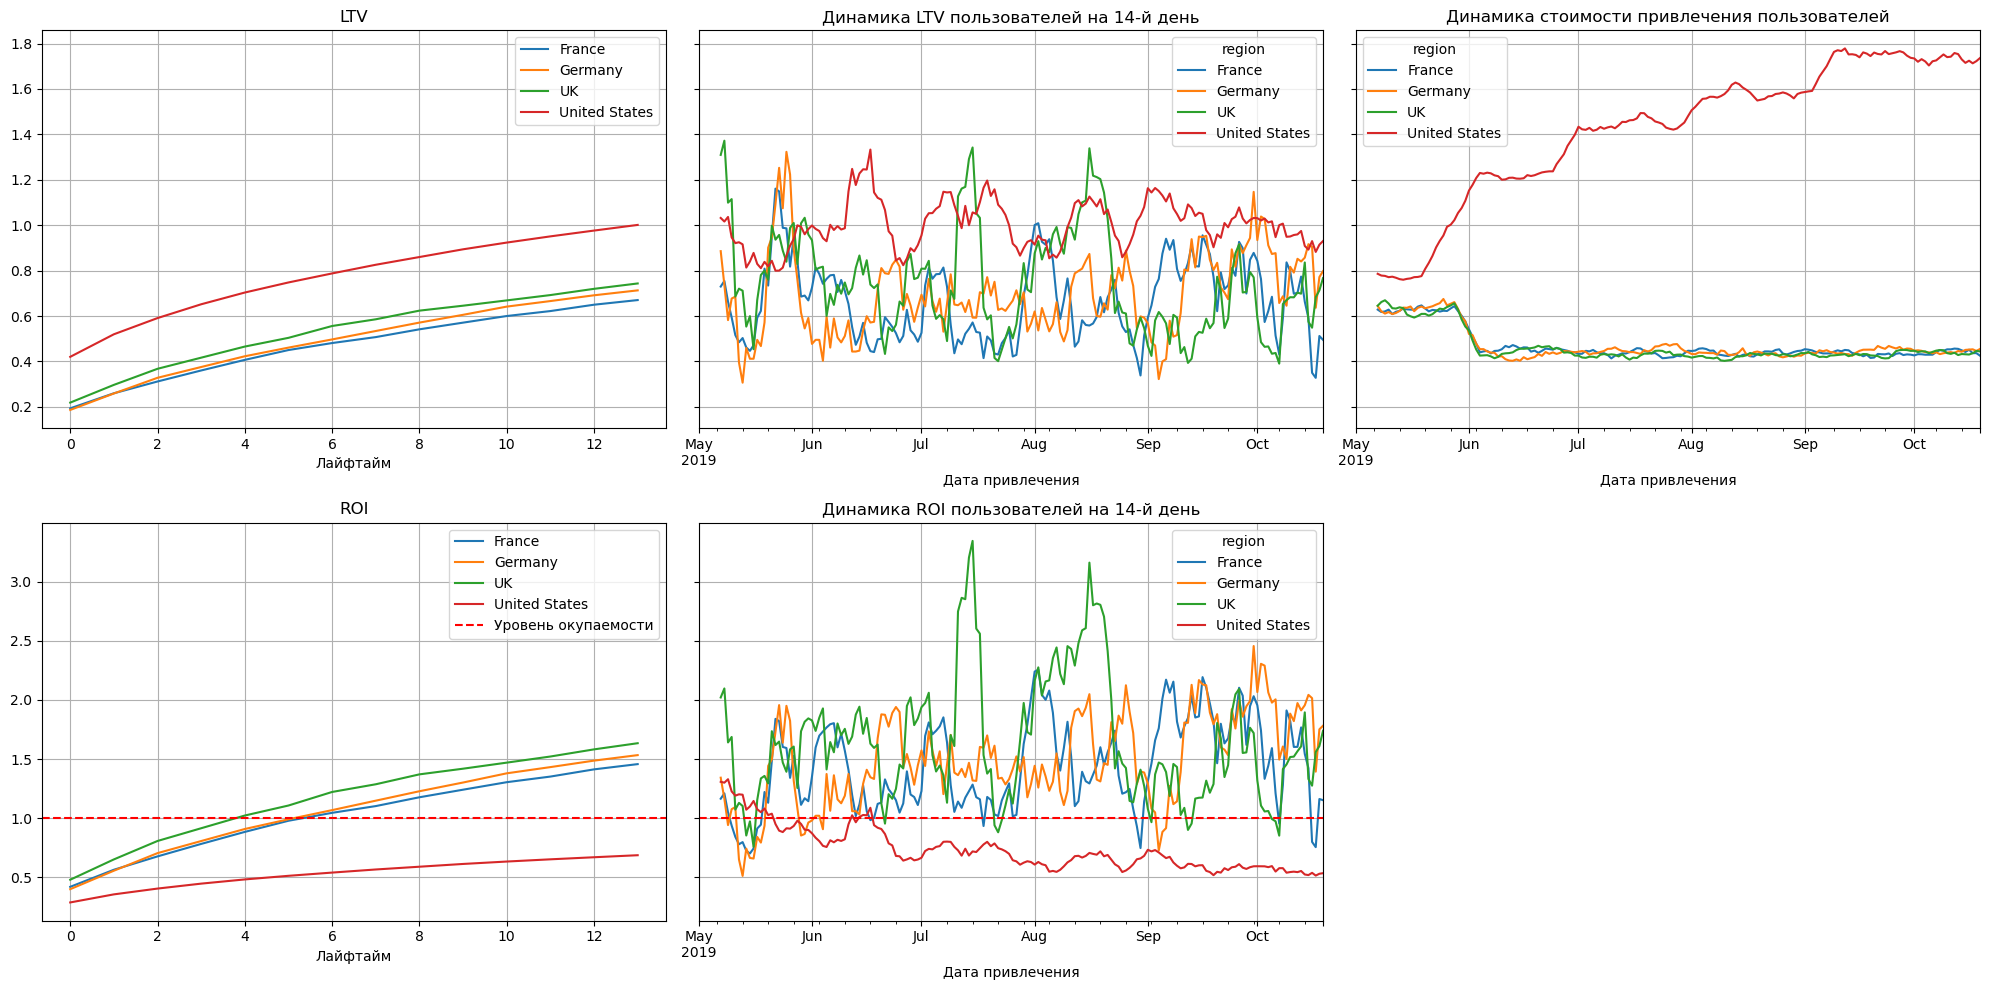

In [54]:
dimensions = ['region'] # задаем разбивку
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=dimensions)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days)

<b> Вывод 5.4: </b> построила графики LTV, ROI, CAC в разбивке по странам.
1. LTV стабилен. LTV для США выше, чем для остальных стран.
2. CAC для США резко увеличился в середине мая и продолжал расти. При этом CAC для Франции, Германии и Великобритании снизился в середине мая - начале июня и держался примерно на одном уровне.
3. ROI для Франции, Германии и Великобритании преодлевает уровень окупаемости, для США - нет. ROI в динамике для Франции, Германии и Великобритании также положительны, а для США в мае был выше единицы и плномерно снижается.

### Анализ окупаемости рекламы с разбивкой по рекламным каналам

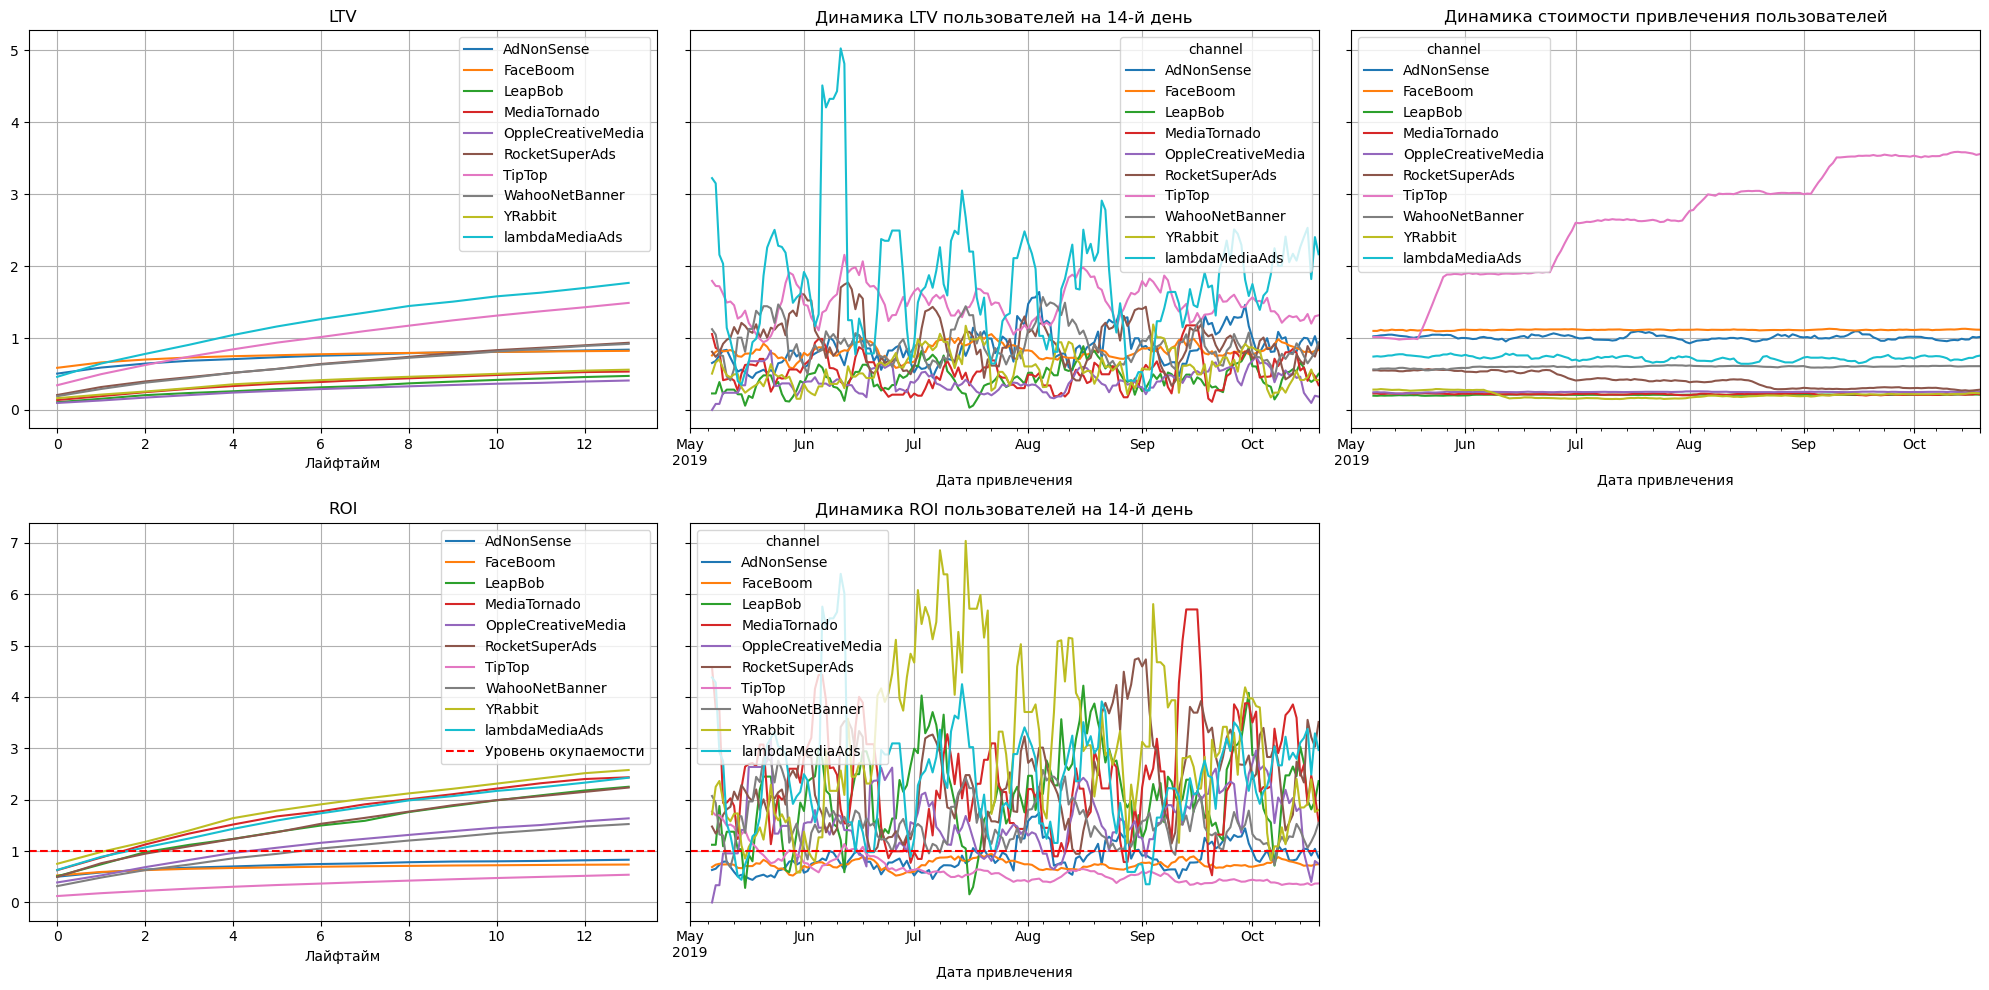

In [55]:
dimensions = ['channel'] # задаем разбивку
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=dimensions)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days)

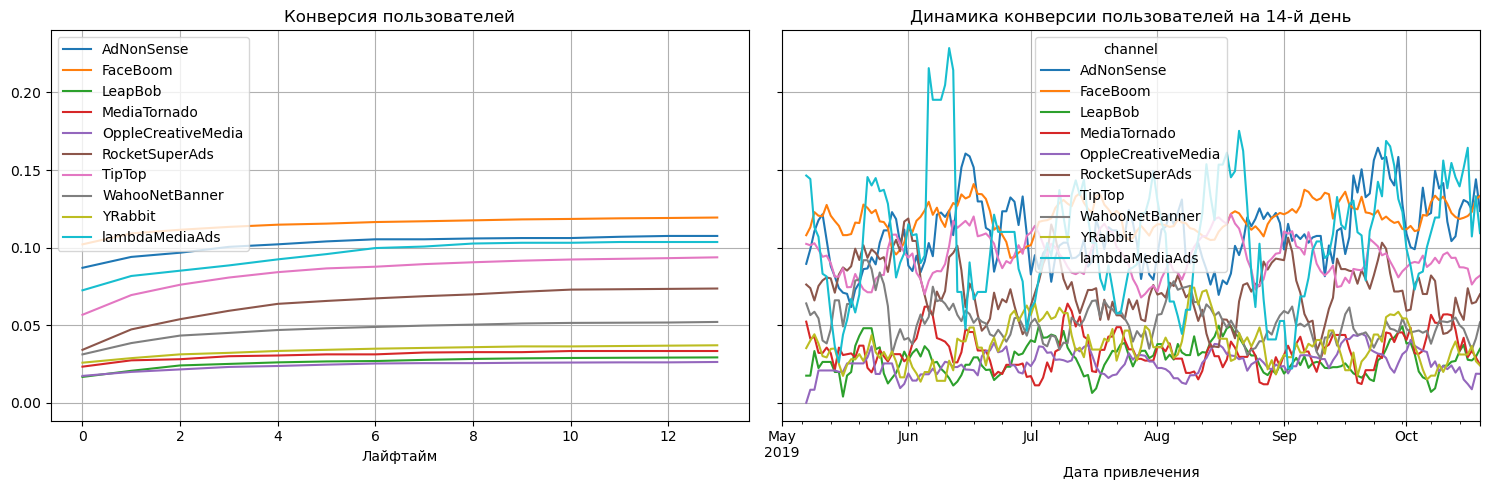

In [56]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)
plot_conversion(conversion, conversion_history, horizon_days, window=7)

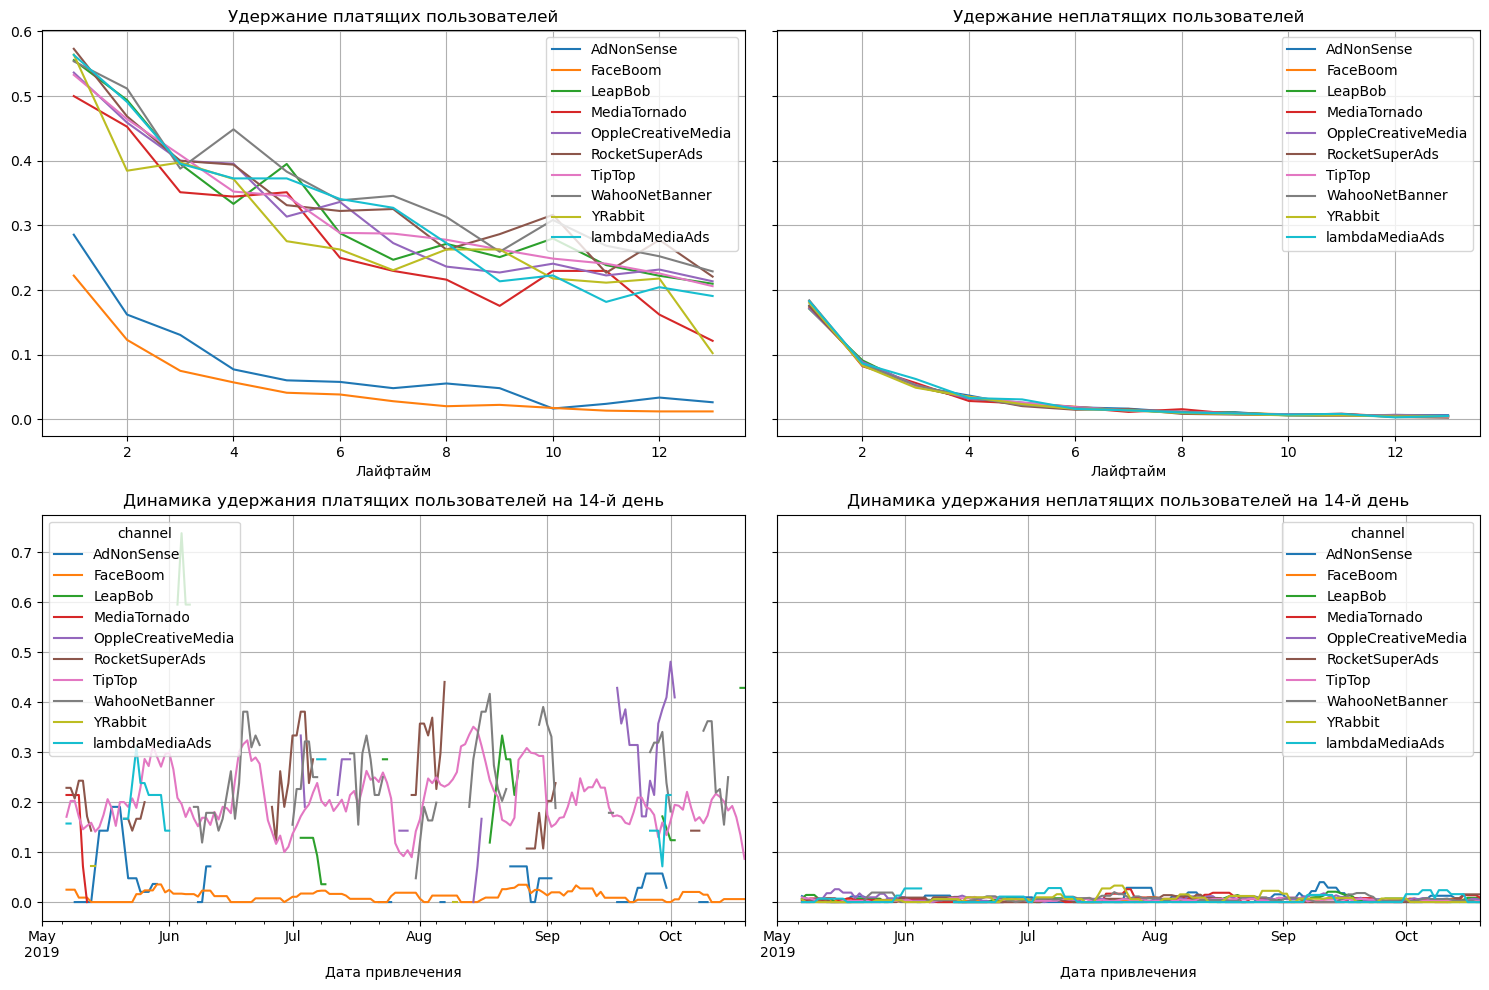

In [57]:
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)
plot_retention(retention, retention_history, horizon_days)

<b> Вывод 5.5: </b> построила графики LTV, ROI, CAC в разбивке по каналам рекламы.
1. CAC для TipTop растет скачками каждый месяц. Для остальных каналов CAC остается стабильным, значения и не увеличиваются, и не уменьшаются.
2. Ниже уровня окупаемости оказались каналы TipTop, FaceBoom, AdNonSense. Реклама на всех остальных каналах окупилась, причем хорошие значения показывал канал YRabbit в июле.
3. Можно выделить "хорошие" каналы: lambdaMediaAds (хороший LTV, стабильный и невысокий CAC, ROI выше уровня окупаемости, при этом: в топ-3 по конверсии и хорошее удержание платящих пользователей), RocketSuperAds (аналогичные показатели) и WahooNetBanner.
4. Можно отметить, что FaceBoom, AdNonSense хорошо конвертируются, но плохо удерживаются.

<b> Вывод 5: </b> в целом реклама близка к окупаемости (ROI 0.8), но не окупается. Негативное влияние на окупаемость рекламы оказывают устройства iPhone и MAC (возможно здесь тех. неполадка), регион рекламы - США (высокая стоимость привлечения 1 пользователя и ттолько увеличивалась), канал рекламы - TipTop (высокая стоимость привлечения 1 пользователя при низкой окупаемости).
Проблемы с окупаемостью могут быть связаны с коротким горизонтом анализа (возможно следует оценить окупаемость рекламы с бОльшим горизонтом), неравномерным распределением расходов на рекламу (вкладывались в рекламу на тех площадках, которые не окупались).

## Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

<b> Причины неэффективности привлечения пользователей: </b>

Проведена оценка окупаемости рекламы. Рассчитаны LTV и ROI, построены графики. 

На основе графиков можно сделать следующие выводы: 

1. Реклама не окупается за 14 дней, ROI = 80%. CAC не постоянная величена, а увеличивается со временем. Траты на рекламу также увеличиваются со временем. LTV стабилен. ROI в динамике снижается. В мае-июне 2019 был выше уровня окупаемости, далее планомерно снижался примерно до 0.6.

2. При разбивке по устройствам: CAC росла со временем для всех устройств: причем для пользователей MAC и iPhone был резкий скачок в июне, Android и PC росли более плавно. ROI для PC больше единицы, причем в динамике наблюдаются постоянные скачки относительно уровня окупаемости вверх и вниз. ROI для Android приближается к 1 и выше общего ROI в 0.8, в динамике планомерно снижается. ROI для MAC и iPhone ниже общего ROI в 0.8, в динамике также снижаются, причем показатель стал ниже уровня окупаемости уже в июне.

3. При разбивке по странам: CAC для США резко увеличился в середине мая и продолжал расти. При этом CAC для Франции, Германии и Великобритании снизился в середине мая - начале июня и держался примерно на одном уровне. ROI для Франции, Германии и Великобритании преодлевает уровень окупаемости, для США - нет. ROI в динамике для Франции, Германии и Великобритании также положительны, а для США в мае был выше единицы и планомерно снижается.

4. При разбивке по каналам рекламы: CAC для TipTop растет скачками каждый месяц. Для остальных каналов CAC остается стабильным, значения и не увеличиваются, и не уменьшаются. Ниже уровня окупаемости оказались каналы TipTop, FaceBoom, AdNonSense. Реклама на всех остальных каналах окупилась, причем хорошие значения показывал канал YRabbit в июле.

<B> Рекомендации для отдела маркетинга: </B>

1. Следует обратить внимание на пользователей MAC, iPhone, Android. Стоимость привлечения пользователей увеличивается при этом нет окупаемости. Стоит помнить, что доля платящих пользователей на Mac самая высокая - 6.4%, далее iPhone - 6.2%, Android - 5.8%.
2. Основные пользователи из США, при этом они хуже всего окупаются. Для Франции, Германии и Великобритании стоимость привлечения одного пользователя примерно одинакова и реклама окупается. Поэтому следует обратить больше вниимания на рекламу для пользователей из Франции, Германии и Великобритании.
3. Следует сократить траты на рекламу в TipTop и FaceBoom. А далее перераспределить этот бюджет на другие каналы, более окупаемые, например, YRabbit.
4. Возможно, стоит разработать спец. предложение для пользователей ОС IOS и Android. 
5. Доработала пункт выше: рекомендую обратить внимание на каналы lambdaMediaAds, RocketSuperAds и WahooNetBanner. У них хороший LTV, стабильный и невысокий CAC, ROI выше уровня окупаемости, при этом: в топ-6 по конверсии и хорошее удержание платящих пользователей.